# Import Library

In [1]:
import pandas as pd
import numpy as np
from datetime import date
from datetime import datetime
import ast

import warnings
warnings.filterwarnings('ignore')

#visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 10000)

# Read Data

In [2]:
transaction_new = pd.read_csv("../input/fashion-campus/transaction_new.csv")
cust = pd.read_csv("../input/fashion-campus/customer.csv")
products = pd.read_csv('../input/fashion-campus/product.csv', on_bad_lines='skip')
click_new = pd.read_csv('../input/fashion-campus/click_stream_new.csv')

In [3]:
products

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [4]:
transaction_new

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820,30642,2,113410
1254581,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213
1254582,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835
1254583,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143,11312,1,188646


In [5]:
pd.merge(transaction_new, products[['id', 'articleType']], left_on='product_id', right_on="id", how='left')

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,id,articleType
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247,54728.0,Casual Shoes
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526,16193.0,Sweaters
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174,53686.0,Handbags
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012,20228.0,Sweaters
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753,55220.0,Lip Liner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820,30642,2,113410,30642.0,Tshirts
1254581,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213,19394.0,Jackets
1254582,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835,13079.0,Casual Shoes
1254583,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143,11312,1,188646,11312.0,Trousers


# Labelling

In [6]:
trx2 = transaction_new[transaction_new["payment_status"] == "Success"]
trx2.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753


In [7]:
cust_trx= pd.merge(cust[["customer_id","first_join_date"]],trx2[["customer_id","created_at"]], on = "customer_id", how = "left")
cust_trx

,customer_id,first_join_date,created_at
0,2870,2019-07-21,NaN
1,8193,2017-07-16,NaN
2,7279,2020-08-23,2020-08-23T12:53:12.916342Z
3,7279,2020-08-23,2020-08-23T12:53:12.916342Z
4,7279,2020-08-23,2020-08-31T13:34:59.916342Z
...,...,...,...
1250788,40573,2021-07-17,2021-10-21T15:43:07.139547Z
1250789,40573,2021-07-17,2022-01-23T19:01:48.139547Z
1250790,40573,2021-07-17,2022-03-11T19:03:09.139547Z
1250791,40573,2021-07-17,2022-04-27T20:00:55.139547Z


In [8]:
cust_trx["created_at"] = pd.to_datetime(cust_trx["created_at"])
cust_trx["first_join_date"] = pd.to_datetime(cust_trx["first_join_date"])

In [9]:
cust_trx

,customer_id,first_join_date,created_at
0,2870,2019-07-21,NaT
1,8193,2017-07-16,NaT
2,7279,2020-08-23,2020-08-23 12:53:12.916342+00:00
3,7279,2020-08-23,2020-08-23 12:53:12.916342+00:00
4,7279,2020-08-23,2020-08-31 13:34:59.916342+00:00
...,...,...,...
1250788,40573,2021-07-17,2021-10-21 15:43:07.139547+00:00
1250789,40573,2021-07-17,2022-01-23 19:01:48.139547+00:00
1250790,40573,2021-07-17,2022-03-11 19:03:09.139547+00:00
1250791,40573,2021-07-17,2022-04-27 20:00:55.139547+00:00


In [10]:
cust_trx['created_at'] = cust_trx['created_at'].dt.strftime('%Y-%m')
cust_trx['first_join_date'] = cust_trx['first_join_date'].dt.strftime('%Y-%m')

In [11]:
cust_trx

,customer_id,first_join_date,created_at
0,2870,2019-07,NaN
1,8193,2017-07,NaN
2,7279,2020-08,2020-08
3,7279,2020-08,2020-08
4,7279,2020-08,2020-08
...,...,...,...
1250788,40573,2021-07,2021-10
1250789,40573,2021-07,2022-01
1250790,40573,2021-07,2022-03
1250791,40573,2021-07,2022-04


In [12]:
cust_trx.sort_values(by='first_join_date',ascending=False)

,customer_id,first_join_date,created_at
625637,46547,2022-07,2022-07
926091,55292,2022-07,2022-07
1164443,83227,2022-07,2022-07
1164442,83227,2022-07,2022-07
1164441,83227,2022-07,2022-07
...,...,...,...
966405,74089,2016-06,2018-12
949946,38119,2016-06,NaN
966407,74089,2016-06,2021-05
977801,69114,2016-06,NaN


## Cust nvr trx

In [13]:
cust_nvr_trx = cust_trx[cust_trx["created_at"].isna()]
cust_nvr_trx.shape

(49758, 3)

sebanyak 49.758 (unique) customer tidak pernah transaksi sukses, sisanya yakni 50.242 customer (unique) pernah transaksi sukses

## Cust trx

In [14]:
cust_trx2 = cust_trx[~cust_trx["created_at"].isna()]
cust_trx2.shape

(1201035, 3)

In [15]:
cust_trx2

,customer_id,first_join_date,created_at
2,7279,2020-08,2020-08
3,7279,2020-08,2020-08
4,7279,2020-08,2020-08
5,7279,2020-08,2020-09
6,7279,2020-08,2020-09
...,...,...,...
1250788,40573,2021-07,2021-10
1250789,40573,2021-07,2022-01
1250790,40573,2021-07,2022-03
1250791,40573,2021-07,2022-04


In [16]:
# groupkan berdasarkan customer_id dan created_at
cust_trx4 = cust_trx2.groupby(["customer_id","created_at"])['first_join_date'].first().reset_index()

In [17]:
cust_trx4

,customer_id,created_at,first_join_date
0,3,2018-08,2018-08
1,3,2018-09,2018-08
2,3,2018-10,2018-08
3,3,2018-11,2018-08
4,3,2018-12,2018-08
...,...,...,...
565536,99998,2020-07,2018-07
565537,99998,2021-01,2018-07
565538,99998,2021-07,2018-07
565539,99998,2022-01,2018-07


In [18]:
cust_trx4["created_at"] = pd.to_datetime(cust_trx4["created_at"])

In [19]:
size = cust_trx4.shape[0]
#temp = pd.DataFrame(columns=['A'])
a = []
for i in range (size-1) :
    # jika nilai pada baris ke i di kolom ke 0 == nilai pada baris selanjutnya kolom ke 0 (merupakan cust yg sama)
    if cust_trx4.iloc[i,0] == cust_trx4.iloc[i+1,0] :
        # maka (created_at pada bulan next - created_at pd bulan before) dibagi 1 bulan
        # ini untuk mencari jarak bulan transaksi sukses selanjutnya
        a.append((cust_trx4.iloc[i+1,1] - cust_trx4.iloc[i,1])/np.timedelta64(1,'M'))
    # jika nilai pada baris ke i di kolom ke 0 != nilai pada baris selanjutnya kolom ke 0 (merupakan cust yg berbeda)
    else :
        # maka (created_at pada bulan now - created_at pd bulan now) dibagi 1 bulan
        # alias hasilnya 0, alias itu transaksi terakhir si cust tsb, atau bisa jd dia cuma transaksi sekali
        a.append((cust_trx4.iloc[i,1] - cust_trx4.iloc[i,1])/np.timedelta64(1,'M'))

In [20]:
diff = pd.DataFrame(a, columns = ["diff"])
diff = round(diff)
diff.head()

,diff
0,1.0
1,1.0
2,1.0
3,1.0
4,2.0


In [21]:
# langsung aja concat kalo emang jumlah rowsnya sama dan yakin dia emang seharusnya ada di row itu

cust_trx5 = pd.concat([cust_trx4, diff], axis=1)
cust_trx5["diff"] = cust_trx5["diff"].fillna(0)
cust_trx5

,customer_id,created_at,first_join_date,diff
0,3,2018-08-01,2018-08,1.0
1,3,2018-09-01,2018-08,1.0
2,3,2018-10-01,2018-08,1.0
3,3,2018-11-01,2018-08,1.0
4,3,2018-12-01,2018-08,2.0
...,...,...,...,...
565536,99998,2020-07-01,2018-07,6.0
565537,99998,2021-01-01,2018-07,6.0
565538,99998,2021-07-01,2018-07,6.0
565539,99998,2022-01-01,2018-07,0.0


disini, 1 berati jarak antara transaksi bulan sekarang dengan transaksi selanjutnya, berjarak 1 bulan. kalo 0 berati dah gada transaksi lagi (ga dipake), kalo 2,3dst berati ya jarak antara transaksi bulan ini dgn transaksi selanjutnya berjarak sesuai angka itu (churn)

In [22]:
def renovated(df) : 
    if df["diff"] == 1 : 
        return 0
    elif df["diff"] == 0 :
        return 2
    else :
        return 1

    
cust_trx5["flagging"] = cust_trx5.apply(renovated, axis =1 )

disni berati, ketika jarak transaksi sekarang dgn selanjutnya adalah 1 bulan, dia akan dilabeli 0, maka dia terhitung transaksi rutin. kalo jaraknya 0 bulan, dia akan dilabeli 2, dan ketika jarak ke transaksi selanjutnya adalah di atas 1 bulan, dia akan dilabeli 1 (churn)

In [23]:
cust_trx5

,customer_id,created_at,first_join_date,diff,flagging
0,3,2018-08-01,2018-08,1.0,0
1,3,2018-09-01,2018-08,1.0,0
2,3,2018-10-01,2018-08,1.0,0
3,3,2018-11-01,2018-08,1.0,0
4,3,2018-12-01,2018-08,2.0,1
...,...,...,...,...,...
565536,99998,2020-07-01,2018-07,6.0,1
565537,99998,2021-01-01,2018-07,6.0,1
565538,99998,2021-07-01,2018-07,6.0,1
565539,99998,2022-01-01,2018-07,0.0,2


In [24]:
final_flagging = cust_trx5[cust_trx5["flagging"] <= 1].drop(columns=['diff'])
final_flagging

,customer_id,created_at,first_join_date,flagging
0,3,2018-08-01,2018-08,0
1,3,2018-09-01,2018-08,0
2,3,2018-10-01,2018-08,0
3,3,2018-11-01,2018-08,0
4,3,2018-12-01,2018-08,1
...,...,...,...,...
565534,99998,2019-07-01,2018-07,1
565535,99998,2020-01-01,2018-07,1
565536,99998,2020-07-01,2018-07,1
565537,99998,2021-01-01,2018-07,1


nah disini, yang label 2 di drop, yang mana jika cust tsb cuma trans sekali selama ini atau itu adalah transaksi terakhirnya, maka dia tidak akan diikutkan ke dalam pembuatan untuk feature

In [25]:
final_flagging["flagging"].value_counts(normalize = True)

0    0.620106
1    0.379894
Name: flagging, dtype: float64

- 1 adalah nasabah churn
- 0 adalah nasabah yang trx rutin

# Feature Engineering

feature engineering adalah proses untuk **menghasilkan/membuat feature** untuk modeling

# 1. Transaction

In [26]:
transaction_new

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820,30642,2,113410
1254581,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213
1254582,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835
1254583,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143,11312,1,188646


In [27]:
transaction_new.dtypes

created_at                 object
customer_id                 int64
booking_id                 object
session_id                 object
payment_method             object
payment_status             object
promo_amount                int64
promo_code                 object
shipment_fee                int64
shipment_date_limit        object
shipment_location_lat     float64
shipment_location_long    float64
total_amount                int64
product_id                  int64
quantity                    int64
item_price                  int64
dtype: object

In [28]:
transaction_new["created_at"] = pd.to_datetime(transaction_new["created_at"], errors='coerce')
transaction_new["created_at"] = transaction_new["created_at"].dt.strftime('%Y-%m')
transaction_new["created_at"] = pd.to_datetime(transaction_new["created_at"], errors='coerce')

In [29]:
transaction_new.dtypes

created_at                datetime64[ns]
customer_id                        int64
booking_id                        object
session_id                        object
payment_method                    object
payment_status                    object
promo_amount                       int64
promo_code                        object
shipment_fee                       int64
shipment_date_limit               object
shipment_location_lat            float64
shipment_location_long           float64
total_amount                       int64
product_id                         int64
quantity                           int64
item_price                         int64
dtype: object

In [30]:
transaction_new["promo_code"]=transaction_new["promo_code"].fillna(0)

In [31]:
transaction_new

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-01,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-01,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,0,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-01,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,0,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,0,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-01,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,0,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,2021-09-01,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,0,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820,30642,2,113410
1254581,2021-12-01,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213
1254582,2021-12-01,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835
1254583,2019-12-01,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143,11312,1,188646


In [32]:
def tn(df) : 
    if df["promo_code"] == 0 : 
        return 0
    else :
        return 1

    
transaction_new["promo_code2"] = transaction_new.apply(tn, axis =1 )

In [33]:
transaction_new

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,promo_code2
0,2018-07-01,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247,1
1,2018-07-01,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,0,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526,0
2,2018-09-01,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,0,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174,0
3,2018-11-01,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,0,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012,0
4,2018-12-01,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,0,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,2021-09-01,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,0,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820,30642,2,113410,0
1254581,2021-12-01,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213,1
1254582,2021-12-01,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835,1
1254583,2019-12-01,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143,11312,1,188646,1


In [34]:
transaction_new2 = transaction_new.groupby(["customer_id","created_at"], as_index = False).agg({"promo_code2" : ["sum"], "quantity" : ["sum"]
                                                                                                ,"promo_amount" : ["sum"], "total_amount" : ["sum"]
                                                                               
})
transaction_new2.columns = list(map(''.join,transaction_new2.columns.values))

In [35]:
transaction_new2

,customer_id,created_at,promo_code2sum,quantitysum,promo_amountsum,total_amountsum
0,3,2018-08-01,1,5,8073,826597
1,3,2018-09-01,0,1,0,163784
2,3,2018-10-01,1,1,8828,124932
3,3,2018-11-01,1,1,3415,247902
4,3,2018-12-01,1,1,2645,181237
...,...,...,...,...,...,...
584755,99998,2020-07-01,0,2,0,1068674
584756,99998,2021-01-01,1,1,8569,366178
584757,99998,2021-07-01,0,2,0,485330
584758,99998,2022-01-01,16,22,31264,67558976


In [36]:
transaction_new2.dtypes

customer_id                 int64
created_at         datetime64[ns]
promo_code2sum              int64
quantitysum                 int64
promo_amountsum             int64
total_amountsum             int64
dtype: object

In [37]:
transaction_new3 = final_flagging.merge(transaction_new2[['customer_id','created_at', 'promo_code2sum','quantitysum','promo_amountsum','total_amountsum']], on=['customer_id','created_at'], how='left')

In [38]:
transaction_new3

,customer_id,created_at,first_join_date,flagging,promo_code2sum,quantitysum,promo_amountsum,total_amountsum
0,3,2018-08-01,2018-08,0,1,5,8073,826597
1,3,2018-09-01,2018-08,0,0,1,0,163784
2,3,2018-10-01,2018-08,0,1,1,8828,124932
3,3,2018-11-01,2018-08,0,1,1,3415,247902
4,3,2018-12-01,2018-08,1,1,1,2645,181237
...,...,...,...,...,...,...,...,...
515294,99998,2019-07-01,2018-07,1,1,1,5670,384029
515295,99998,2020-01-01,2018-07,1,1,1,4912,216338
515296,99998,2020-07-01,2018-07,1,0,2,0,1068674
515297,99998,2021-01-01,2018-07,1,1,1,8569,366178


# 2. traffic source (device)

ini karena masing2 device pasti punya sessionnya masing-masing. tidak mungkin device yang berbeda memiliki session_id yang sama



In [39]:
click_traffic = click_new.groupby(['session_id'])[['traffic_source']].first().reset_index()
click_traffic

,session_id,traffic_source
0,00001f29-3ede-4445-95f0-0178934e32ba,MOBILE
1,00003eca-954b-4150-aee1-63fc62f395cf,MOBILE
2,0000425b-ddc8-4459-a240-6ba814dac132,MOBILE
3,00005746-17ec-449c-9c5c-699a3ea9304a,MOBILE
4,0000649b-9514-4600-979b-42166a798996,MOBILE
...,...,...
895198,ffffce53-1ba7-4d7d-a14a-ffa7079cfbff,WEB
895199,ffffd3d9-79db-459e-a427-388204a7aac7,MOBILE
895200,ffffdf8e-dea1-42bc-9839-7662675c0d38,MOBILE
895201,fffff7cf-2a18-4303-9c12-aa836ae3b543,MOBILE


In [40]:
trx_click = pd.merge(trx2[['created_at','customer_id','session_id']], click_traffic[['session_id','traffic_source']], on='session_id')

trx_click['created_at'] = pd.to_datetime(trx_click["created_at"])
trx_click['created_at'] = trx_click['created_at'].dt.strftime('%Y-%m')
trx_click['created_at'] = pd.to_datetime(trx_click["created_at"])

trx_click2 = trx_click.groupby(['customer_id','created_at','traffic_source']).count().reset_index()
trx_click2

,customer_id,created_at,traffic_source,session_id
0,3,2018-08-01,MOBILE,1
1,3,2018-09-01,MOBILE,1
2,3,2018-10-01,MOBILE,1
3,3,2018-11-01,MOBILE,1
4,3,2018-12-01,MOBILE,1
...,...,...,...,...
599993,99998,2020-07-01,MOBILE,2
599994,99998,2021-01-01,MOBILE,1
599995,99998,2021-07-01,MOBILE,1
599996,99998,2022-01-01,MOBILE,16


In [41]:
# one hot encoding karena datanya merupakan kategori

trx_click3 = pd.get_dummies(trx_click2['traffic_source'])
trx_click3 = trx_click3.rename(columns = {
    'MOBILE' : 'mobile_used',
    'WEB' : 'web_used'
})
trx_click3

,mobile_used,web_used
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
599993,1,0
599994,1,0
599995,1,0
599996,1,0


In [42]:
trx_click4 = pd.concat([trx_click2, trx_click3], axis=1)
trx_click5 = trx_click4.groupby(['customer_id','created_at']).sum().reset_index()

trx_click5

,customer_id,created_at,session_id,mobile_used,web_used
0,3,2018-08-01,1,1,0
1,3,2018-09-01,1,1,0
2,3,2018-10-01,1,1,0
3,3,2018-11-01,1,1,0
4,3,2018-12-01,1,1,0
...,...,...,...,...,...
565534,99998,2020-07-01,2,1,0
565535,99998,2021-01-01,1,1,0
565536,99998,2021-07-01,1,1,0
565537,99998,2022-01-01,16,1,0


In [43]:
# di merge dengan label churn yang dah dibikin, di merge berdasarkan customer_id dan created_at

trx_click6 = final_flagging.merge(trx_click5.iloc[:,[0,1,3,4]], on=['customer_id','created_at'], how='left')
trx_click6

,customer_id,created_at,first_join_date,flagging,mobile_used,web_used
0,3,2018-08-01,2018-08,0,1.0,0.0
1,3,2018-09-01,2018-08,0,1.0,0.0
2,3,2018-10-01,2018-08,0,1.0,0.0
3,3,2018-11-01,2018-08,0,1.0,0.0
4,3,2018-12-01,2018-08,1,1.0,0.0
...,...,...,...,...,...,...
515294,99998,2019-07-01,2018-07,1,1.0,0.0
515295,99998,2020-01-01,2018-07,1,1.0,0.0
515296,99998,2020-07-01,2018-07,1,1.0,0.0
515297,99998,2021-01-01,2018-07,1,1.0,0.0


In [44]:
# ini untuk menghitung persebaran data churn dari feature web_used

asess_1 = pd.crosstab(trx_click6["web_used"], trx_click6["flagging"], margins=True, margins_name="Total")
asess_1

flagging,0,1,Total
web_used,,,
0.0,267957,176132,444089
1.0,51583,19626,71209
Total,319540,195758,515298


In [45]:
# Let's create function nonevent & event
def nonevent(df) : 
    return (df[0]/319540)
def event(df) : 
    return (df[1]/195758)

# Apply function nonevent & event and save it to new columns %nonevent & %event
asess_1["%nonevent"] = asess_1.apply(nonevent, axis = 1)
asess_1["%event"] = asess_1.apply(event, axis = 1)

In [46]:
#Let's calculate WoE and save it to new a column WoE
asess_1["WoE"] = np.log(asess_1["%event"]/asess_1["%nonevent"])

# Let's calculate IV and save it to new a column IV
asess_1["IV"] = asess_1["WoE"]*(asess_1["%event"] - asess_1["%nonevent"])

#Let's sum IV
asess_1["IV"].sum() # Weak Predictor

0.03344570026681302

karena IV nya 0.03, maka feature web_used merupakan weak predictor (namun tetap bisa digunakan untuk modelling). silakan lakukan hal yang sama untuk feature mobile_used dan feature lainnya

# Feature Selection
feature selection artinya kita **memilih feature** mana yang akan kita gunakan untuk modeling. feature yang dipilih merupakan feature yang memiliki IV > 0.02 (termasuk kategori weak, medium, serta strong predictor)

In [47]:
# feature_all = trx_click6.copy()
feature_all = pd.merge(trx_click6, transaction_new3[['customer_id','created_at', 'promo_code2sum','quantitysum','promo_amountsum','total_amountsum']], on=['customer_id','created_at'], how='left')

# kalau udah punya banyak feature, pakai codingan di bawah ini untuk merge semua featurenya menjadi 1 dataframe
# feature_all = <nama_dataframe1>.merge(<nama_dataframe2>, on=['customer_id','created_at','flagging'])
# feature_all = feature_all.merge(<nama_dataframe3>, on=['customer_id','created_at','flagging'])


In [48]:
feature_all

,customer_id,created_at,first_join_date,flagging,mobile_used,web_used,promo_code2sum,quantitysum,promo_amountsum,total_amountsum
0,3,2018-08-01,2018-08,0,1.0,0.0,1,5,8073,826597
1,3,2018-09-01,2018-08,0,1.0,0.0,0,1,0,163784
2,3,2018-10-01,2018-08,0,1.0,0.0,1,1,8828,124932
3,3,2018-11-01,2018-08,0,1.0,0.0,1,1,3415,247902
4,3,2018-12-01,2018-08,1,1.0,0.0,1,1,2645,181237
...,...,...,...,...,...,...,...,...,...,...
515294,99998,2019-07-01,2018-07,1,1.0,0.0,1,1,5670,384029
515295,99998,2020-01-01,2018-07,1,1.0,0.0,1,1,4912,216338
515296,99998,2020-07-01,2018-07,1,1.0,0.0,0,2,0,1068674
515297,99998,2021-01-01,2018-07,1,1.0,0.0,1,1,8569,366178


In [49]:
feature_all["web_used"]=feature_all["web_used"].fillna(0)
feature_all["mobile_used"]=feature_all["mobile_used"].fillna(0)

In [50]:
# code ini untuk mengeksport feature yang sudah kita pilih menjadi file csv agar memudahkan ketika run filenya

# feature_all.to_csv('final_feature.csv',index=False)

In [51]:
X = feature_all.iloc[:,4:]
y = feature_all[["flagging"]]

In [52]:
# ini adalah feature nya yang ingin kita cek IV nya
X

,mobile_used,web_used,promo_code2sum,quantitysum,promo_amountsum,total_amountsum
0,1.0,0.0,1,5,8073,826597
1,1.0,0.0,0,1,0,163784
2,1.0,0.0,1,1,8828,124932
3,1.0,0.0,1,1,3415,247902
4,1.0,0.0,1,1,2645,181237
...,...,...,...,...,...,...
515294,1.0,0.0,1,1,5670,384029
515295,1.0,0.0,1,1,4912,216338
515296,1.0,0.0,0,2,0,1068674
515297,1.0,0.0,1,1,8569,366178


In [53]:
# ini adalah labelnya
y

,flagging
0,0
1,0
2,0
3,0
4,1
...,...
515294,1
515295,1
515296,1
515297,1


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print("Jumlah data training: ", X_train.shape)
print("Jumlah data testing: ", X_test.shape)

Jumlah data training:  (360709, 6)
Jumlah data testing:  (154590, 6)


In [55]:
# ini function untuk menghitung semua IV dari feature yang sudah kita buat tadi (dari proses feature engineering)

def calc_iv(df, feature, target, pr=False):
    
    lst = []

    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())

    iv = data['IV'].sum()

    return iv, data

In [56]:
# iv_df = X_train.copy()
# iv_df["target"] = y_train

# features = iv_df.columns[:-1].tolist()

# iv_list = []
# for feature in features:
    # iv, data = calc_iv(iv_df, feature, 'target')
    # iv_list.append(round(iv,6))

# woe_df = pd.DataFrame(np.column_stack([features, iv_list]), 
                      # columns=['Feature', 'iv'])
# woe_df

diatas merupakan hasil IV dari feature mobile_used dan web_used. dapat dilihat bahwa hasil IV keduanya > 0.02 dan termasuk weak predictor. maka feature ini dapat kita gunakan untuk modeling

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = "newton-cg", max_iter = 1000, C = 3.2)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_log, y_test) * 100, 2)
log_f1 = round(f1_score(y_pred_log, y_test) * 100, 2)

print("Training Accuracy    :",log_train,"%")
print("Model Accuracy Score :",log_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_log))

Training Accuracy    : 62.23 %
Model Accuracy Score : 62.12 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.63      0.96      0.76     95827
           1       0.51      0.07      0.13     58763

    accuracy                           0.62    154590
   macro avg       0.57      0.52      0.44    154590
weighted avg       0.58      0.62      0.52    154590



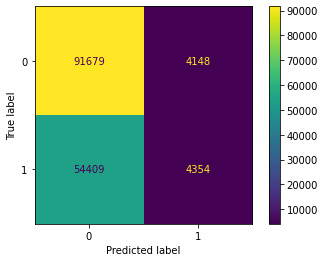

In [58]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logreg, X_test, y_test)
plt.show()